#Simulated Annealing

In [1]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import random

interval = (-5, 5)
maxsteps = 1000

Implementation of Simulated Annealing algorithm.

In [2]:
def simulated_annealing(random_start, cost_function, num_variables, random_neighbour, acceptance, temperature):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state_X = random_start()
    state_Y = random_start()
    cost = 0
    states = [[], [], []]
    costs = []

    if num_variables == 2:
      cost = cost_function(state_X, state_Y)
    else:
      cost = cost_function(state_X)
    
    states[0] = [state_X]
    states[1] = [state_Y]
    states[2] = [cost]

    
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        new_state_X = random_neighbour(state_X, fraction)
        new_state_Y = random_neighbour(state_Y, fraction)
        new_cost = 0

        if num_variables == 2:
          new_cost = cost_function(new_state_X, new_state_Y)
        else:
          new_cost = cost_function(new_state_X)
  
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state_X, state_Y, cost = new_state_X, new_state_Y, new_cost
            states[0].append(state_X)
            states[1].append(state_Y)
            states[2].append(cost)
            costs.append(cost)
    
    return [state_X, state_Y], costs[-1], states, costs

Implementation of some helper function.

In [3]:
def clip(x):
    """ Force x to be in the interval."""
    return max(min(x, interval[1]), interval[0])

def random_start():
    """ Random point in the interval."""
    return interval[0] + (interval[1] - interval[0]) * rn.random_sample()

def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

def acceptance_probability(cost, new_cost, temperature):
    """Calculates the probability of accepting the state."""
    if new_cost < cost:
        return 1
    else:
        return np.exp(- (new_cost - cost) / temperature)

def temperature(fraction):
    """Example of temperature dicreasing as the process goes on."""
    return max(0.01, min(1, 1 - fraction))

Implementation of an abstraction layer to plot graphs and see result of any passed function.

In [4]:
def plot_annealing(states, costs, cost_function, num_variables):
    """Plots 1 variable or 2 variable functions, the states and costs."""
    if num_variables == 2:
        fig = plt.figure(figsize = (20, 10))
        fig.suptitle("Evolution of states and costs of the simulated annealing")
        ax1 = fig.add_subplot(121, projection='3d')
        x = y = np.arange(interval[0], interval[1], 0.05)
        X, Y = np.meshgrid(x, y)
        zs = np.array(cost_function(np.ravel(X), np.ravel(Y)))
        Z = zs.reshape(X.shape)
        ax1.plot_surface(X, Y, Z, alpha = 0.1, cmap='winter')
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_zlabel('f(x, y)')
        ax1.set_title("States")
        ax1.scatter(states[0], states[1], states[2], marker = "o")
        ax2 = fig.add_subplot(122)
        ax2.plot(costs, 'b')
        ax2.set_title("Costs")
        ax2.set_xlabel('Step')
        ax2.set_ylabel('Cost')

    elif num_variables == 1: 
        plt.figure(figsize = (20, 10))
        plt.suptitle("Evolution of states and costs of the simulated annealing")
        plt.subplot(121)
        plt.plot(states[0], 'r')
        plt.title("States")
        plt.xlabel("Step")
        plt.ylabel("x")
        plt.subplot(122)
        plt.plot(costs, 'b')
        plt.title("Costs")
        plt.xlabel("Step")
        plt.ylabel("Cost")
        plt.show()

def visualize_annealing(cost_function, num_variables):
    """A one liner function to call Simulated Annealing on the passed function, log the result and plot the graphs."""

    final_state, final_cost, states, costs = simulated_annealing(random_start, cost_function, num_variables, random_neighbour, acceptance_probability, temperature)
    if num_variables == 2:
      print("Global Minima at x = {0}, y = {1}, for which, the value of f(x, y) = {2}.".format(final_state[0], final_state[1], final_cost))
    elif num_variables == 1:
      print("Global Minima at x = {0}, for which, the value of f(x) = {1}.".format(final_state[0], final_cost))

    plot_annealing(states, costs, cost_function, num_variables)

### Testing different benchmark functions

#### Sphere Function 

$f(\textbf{x}) = f(x_1, x_2, ..., x_n) = {\sum_{i=1}^{n} x_i^{2}}$

#### Input Domain

The function can be defined on any input domain but it is usually evaluated on the hypercube $x_i ∈ [−5.12, 5.12]$ for $i=1,2.$

#### Global Minima

$f(x^*) = 0$ at $x^* = (0, 0)$

Global Minima at x = -0.12186475003254121, y = 0.010705031628405998, for which, the value of f(x, y) = 0.014965615002658927.


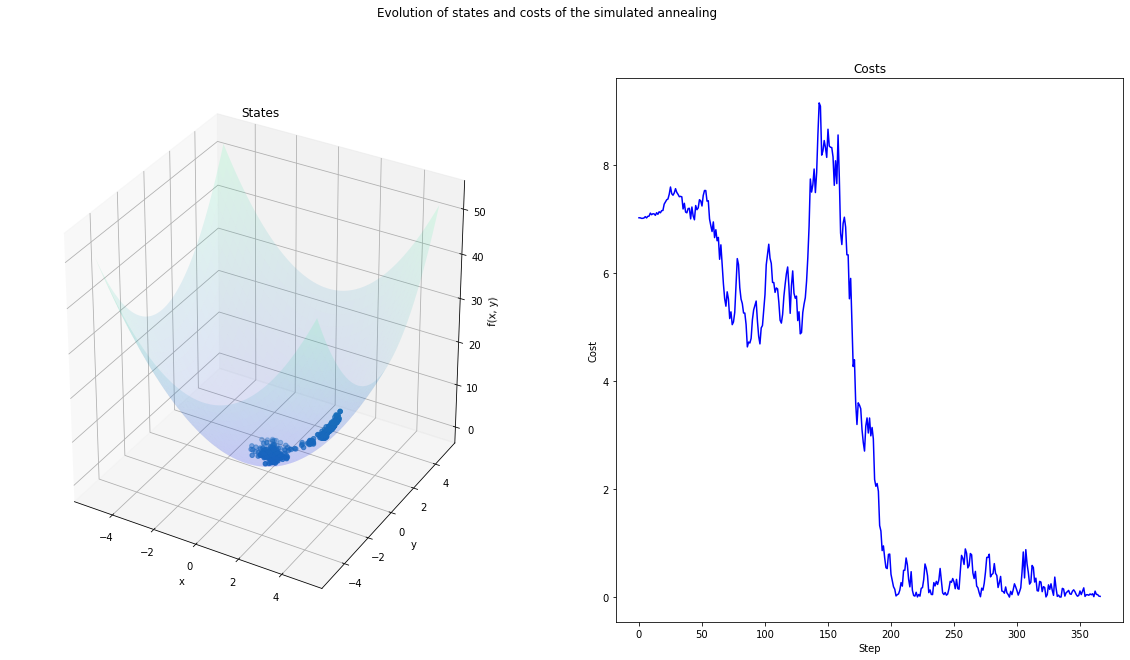

In [5]:
maxsteps = 500
interval = (-5.12, 5.12)
visualize_annealing(lambda x, y: x**2 + y**2, 2)

#### Schwefel 2.20 Function 

$f(\mathbf x)=f(x_1, ..., x_n)=\sum_{i=1}^n |x_i|$


#### Input Domain

The function can be defined on any input domain but it is usually evaluated on the hypercube $x_i ∈ [−100, 100]$ for $i=1,2.$

#### Global Minima

$f(x^*) = 0$ at $x^* = (0, 0)$

Global Minima at x = -0.2313268028653015, y = -0.7233921377704462, for which, the value of f(x, y) = 0.9547189406357477.


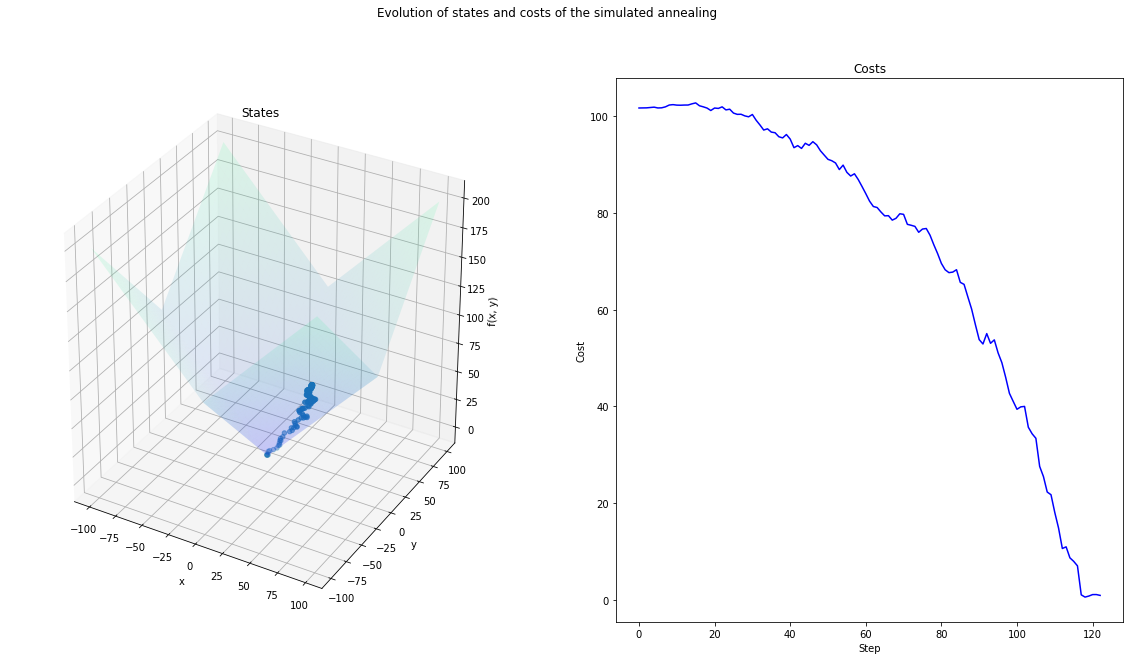

In [6]:
maxsteps = 400
interval = (-100, 100)
visualize_annealing(lambda x, y: np.abs(x) + np.abs(y), 2)

#### Schwefel Function

$f(\textbf{x}) = f(x_1, x_2, ..., x_n) = {\sum_{i=1}^{n} x_i sin(x_i)}$

#### Input Domain

The function can be defined on any input domain but it is usually evaluated on the hypercube $x_i ∈ [−5, 5]$ for $i=1.$

#### Global Minima

$f(x^*) = -4.81447$ at $x^* = (4.91318)$ or $(-4.91318)$

Global Minima at x = -4.864961925086171, for which, the value of f(x) = -4.808447167897477.


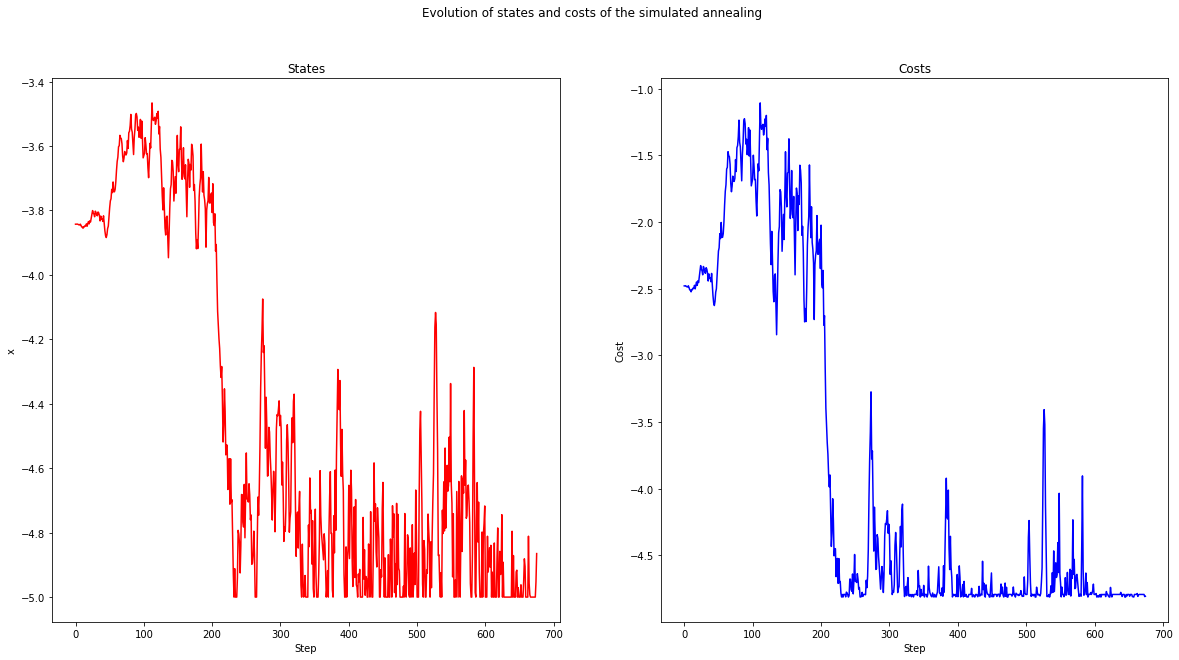

In [7]:
maxsteps = 800
interval = (-5, 5)
visualize_annealing(lambda x: x * np.sin(x), 1)

#### Ackley Function

$f(\textbf{x}) = f(x_1, ..., x_n)= -a.exp(-b\sqrt{\frac{1}{n}\sum_{i=1}^{n}x_i^2})-exp(\frac{1}{n}\sum_{i=1}^{n}cos(cx_i))+ a + exp(1)$

#### Input Domain

The function can be defined on any input domain but it is usually evaluated on the hypercube $x_i ∈ [−32, 32]$ for $a=20, b = 0.2, c = 2\pi$ and $i=1,2.$

#### Global Minima

$f(x^*) = 0$ at $x^* = (0, 0)$

Global Minima at x = -0.1852237141556916, y = -0.19277751594239345, for which, the value of f(x, y) = 2.006999866341815.


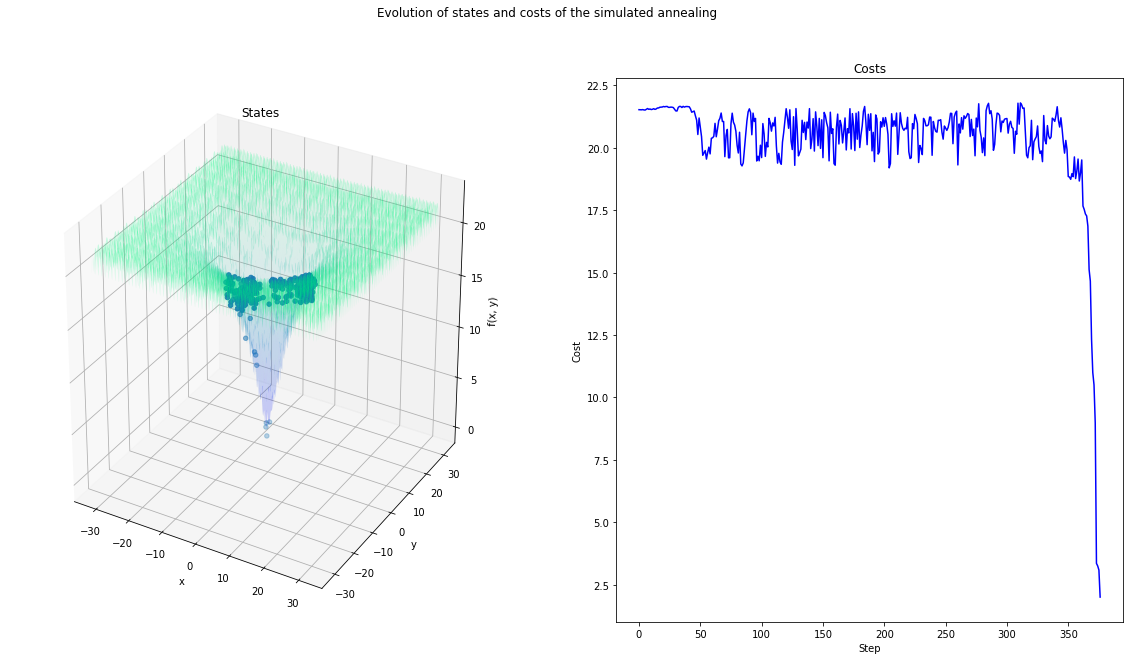

In [8]:
maxsteps = 1000
interval = (-32, 32)
a = 20
b = 0.2
c = 2 * np.pi
visualize_annealing(lambda x, y: -a * np.exp(-b * np.sqrt((x ** 2 + y ** 2) / 2)) - np.exp((np.cos(c * x) + np.cos(c * y)) / 2) + a + np.exp(1), 2)

#### Rastrigin Function

$f(x, y)=10n + \sum_{i=1}^{n}(x_i^2 - 10cos(2\pi x_i))$

#### Input Domain

The function can be defined on any input domain but it is usually evaluated on the hypercube $x_i ∈ [−5.12, 5.12]$ for $i=1, 2.$

#### Global Minima

$f(x^*) = 0$ at $x^* = (0, 0)$

Global Minima at x = -3.94889103934521, y = -2.9881603518352264, for which, the value of f(x, y) = 25.061697089456352.


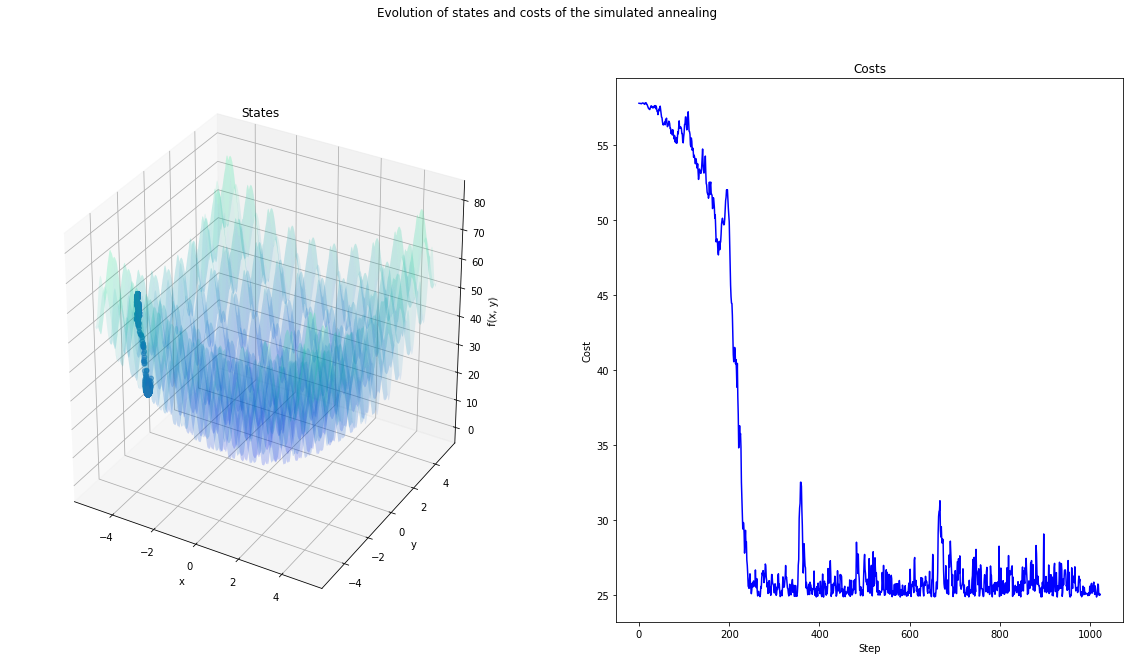

In [9]:
maxsteps = 5000
interval = (-5.12, 5.12)
visualize_annealing(lambda x, y: 10 * 2 + x ** 2 - 10 * np.cos(2 * np.pi * x) + y ** 2 - 10 * np.cos(2 * np.pi * y), 2)

#### Butterfly Function

$f(x, y) = \dfrac{(x^2 - y^2) sin(x+y)}{(x^2 + y^2)}$

#### Input Domain

The function can be defined on any input domain but it is usually evaluated on the hypercube $x_i ∈ [−10, 10]$ for $i=1, 2.$

#### Global Minima

No global minima can be determined for this function.

Global Minima at x = -0.2363650332292725, y = 7.954422357366172, for which, the value of f(x, y) = -0.9890283835168159.


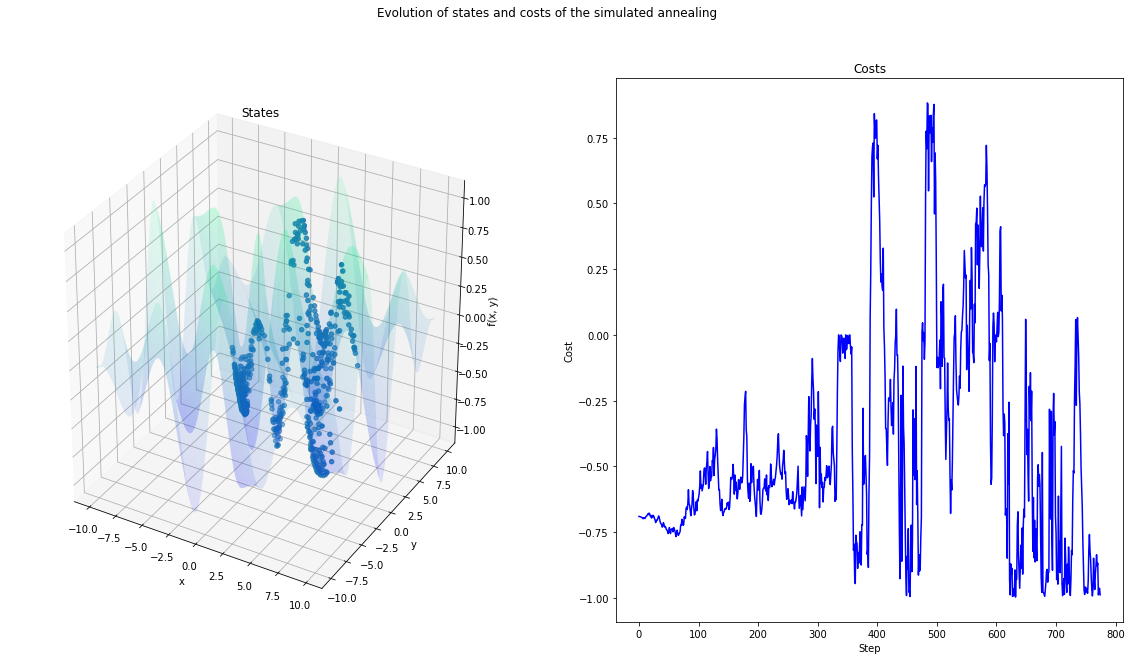

In [10]:
maxsteps = 1000
interval = (-10, 10)
visualize_annealing(lambda x, y: (x**2 - y**2) * np.sin(x + y) / (x**2 + y**2), 2)